# Clothes Classifier

## 1st Class: Knowing the dataset

- In this code we use deep learning to classify what is the category of each clothes according to the image beeing showed to us.

- We're going to use Keras library (Tensorflow)

> Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. [gitHub](https://github.com/zalandoresearch/fashion-mnist)

In [1]:
from tensorflow import keras
import pandas as pd

dataset = keras.datasets.fashion_mnist
((images_train, identity_train), (images_test, identity_test)) = dataset.load_data() 
# images = x, identity = y 
len(images_train)
images_train.shape

(60000, 28, 28)

In [2]:
import matplotlib.pyplot as plt
plt.imshow(images_train[2], cmap = 'gray')

## 2nd Class: Starting to assemble the model 

- Here, I'm trying to show some images from the dataset and identify them, what can help us to understand the process and make better decisions during the construction of the code. 

- The model consists of 3 parts: **1. Input, 2. Processing and 3. Output**.
    - This parts are divided sequentially. Therefore, we're going to use ```keras.Sequential()``` here
    - To use the images, I'm going to use ```keras.layers.Flatten()```. This "tool" convert the image (in this case with 28x28 pixels) to a image with only one row without lose data, only putting all pixels in just one row. This is our **Input layer**

In [3]:
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

print(identity_train)
category_mnist = {0 : "Tshirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 
                  5: "Sandal",  6: "Shirt",   7: "Sneaker",  8: "Bag",   9: "Ankle boot"}



[9 0 0 ... 3 0 5]


In [4]:
names_train = [category_mnist[number] for number in identity_train]
names_train[0:10]

['Ankle boot',
 'Tshirt',
 'Tshirt',
 'Dress',
 'Tshirt',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Sandal']

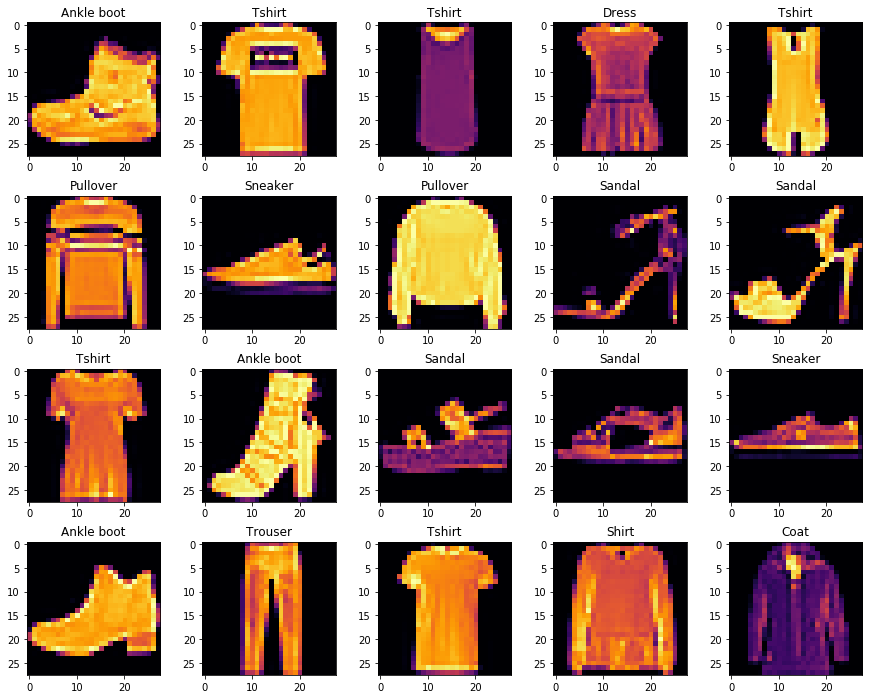

In [5]:
fig, axs = plt.subplots(4, 5, figsize = (15, 12))
image = 0
for row in range(4):
    for column in range(5):
        fig.subplots_adjust(wspace = 0.3, hspace = 0.3)
        axs[row, column].imshow(images_train[image], cmap = "inferno")
        axs[row, column].set_title(names_train[image])
        image = image + 1

## 3rd Class: Adding hidden layers

### Deep Learning model

1. Input layer (Layer 0) --> `keras.layer.Flatten()`
    - Convert the image to a array with the same quantity of pixels

2. Processing layer (Layer 1) --> `keras.layers.Dense()` - using ReLU
    - Make a communication line between the units of the 1st layer with all the units of the 2nd layer

3. Output Layer (Layer 2) --> `keras.layer.Dense()` - using softmax


### ReLU

- Rectified Linear Unit
    - x: input
    - y: output
- Activation function
- Non-linear function (allow us to create a model with more layers / hidden layers)

<img src="https://www.researchgate.net/profile/Brahim_Matougui/publication/335540811/figure/fig5/AS:798392854786050@1567363098679/The-plot-of-the-ReLU-function.ppm" alt="drawing" width="300"/>

In [6]:
import tensorflow
from tensorflow import nn

# Normalizing the images to reduce the loss
images_train = images_train / images_train.max()

model = keras.Sequential([keras.layers.Flatten(input_shape = images_train[0].shape), # Input layer
                         keras.layers.Dense(256, activation = tensorflow.nn.relu),    # Processing layer; nn - neural network,
                         keras.layers.Dropout(0.3),
                         keras.layers.Dense((identity_train.max() + 1), activation = tensorflow.nn.softmax)# output
                         ])

## 4th Class: Training the model

- To train a model of deep learning we need one more step before the famous `.fit()` that we are used to use the `model.compile()`. This method need 2 arguments:
    1. optimizer - method used to improve the solution. We'll use `adam`
    2. loss - Sparse categorical crossentropy.
    
- Hidden layers: layers between the input and the output layer. We can add or remove layers according to what we need. Therefore, we need at least one hidden layer.
    - In this case I used only one hidden layer.

- Epochs: Times that your model is trained. 

In [7]:
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

historic = model.fit(images_train, identity_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5631 - accuracy: 0.8021 - val_loss: 0.4424 - val_accuracy: 0.8406
Epoch 2/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4219 - accuracy: 0.8465 - val_loss: 0.3809 - val_accuracy: 0.8614
Epoch 3/5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3867 - accuracy: 0.8575 - val_loss: 0.3544 - val_accuracy: 0.8723
Epoch 4/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3594 - accuracy: 0.8679 - val_loss: 0.3545 - val_accuracy: 0.8672
Epoch 5/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3447 - accuracy: 0.8725 - val_loss: 0.3460 - val_accuracy: 0.8709


## 5th Class: Testing the model

- Now, we are trying to find a way of improve this model
- **First modification:** Define 5 epochs (instead of 1) when training the model
- **Second modification:** Show accuracy of the model 
- **Third modification:** Add `validation_split`

In [8]:
import numpy as np
result_test = model.predict(images_test)
print("ID   Result ------- Answer")
for i in range(10,30):
    print(i,"     ",  np.argmax(result_test[i]), " --- | --- ", identity_test[i]) 
#     df_id = i
#     df_result = np.argmax(result_test[i])
#     df_answer = identity_test[i]

ID   Result ------- Answer
10       4  --- | ---  4
11       5  --- | ---  5
12       5  --- | ---  7
13       3  --- | ---  3
14       4  --- | ---  4
15       1  --- | ---  1
16       2  --- | ---  2
17       2  --- | ---  4
18       8  --- | ---  8
19       0  --- | ---  0
20       2  --- | ---  2
21       5  --- | ---  5
22       7  --- | ---  7
23       5  --- | ---  9
24       1  --- | ---  1
25       2  --- | ---  4
26       4  --- | ---  6
27       0  --- | ---  0
28       9  --- | ---  9
29       6  --- | ---  3


In [9]:
[loss_test, accuracy_test] = model.evaluate(images_test, identity_test)

313/313 [==============================] - 1s 3ms/step - loss: 54.9174 - accuracy: 0.8465


## 6th Class: Accuracy Graph

To see how the quantity of epochs influences on the accuracy of the test and the validation, we'll use `matplotlib`  to plot that and try to understand what is happening with the model. 

- Overfitting: The model is "understanding" the train samples very well, so weel that can't fit to different values.
    - It generate an excellent accuracy to train data and a bad accuracy with validation data
    
- Underfitting: The model didn't train enough
    - It generate an bad accuracy to train data and maybe a little better accuracy with validation data
    
### Adding a new layer to the model
- We saw that change the number of epochs didn't make the result that we were expecting. Now, we try to change this result by adding a layers to "ignore" or "asleep" some samples of train. To do that, we'll use `Keras.layers.Dropout(<percent of data to be asleep>)`

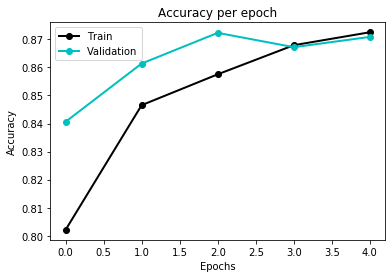

In [10]:
plt.figure()
plt.plot(historic.history['accuracy'], 'ok-', linewidth=2)
plt.plot(historic.history['val_accuracy'], 'oc-', linewidth=2)
plt.title('Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])


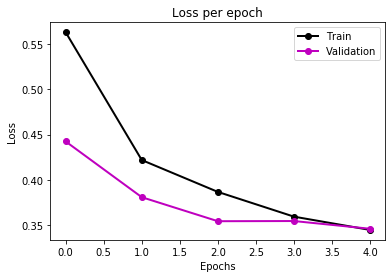

In [11]:

plt.figure()
plt.plot(historic.history['loss'], 'ok-', linewidth=2)
plt.plot(historic.history['val_loss'], 'om-', linewidth=2)
plt.title('Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

In [12]:
from tensorflow.keras.models import load_model

## Saving the model
model.save('model.h5')

## Testing the saved and loaded model
saved_model = load_model('model.h5')


In [13]:
saved_model.evaluate(images_test, identity_test) ## Verify if the result is the same

313/313 [==============================] - 1s 3ms/step - loss: 54.9174 - accuracy: 0.8465


[54.91743850708008, 0.8464999794960022]